## Project Phase 2 
## Group 9:

* Haseeb ur Rehman Faheem -- 23100044
* Ahmed Ateeq -- 22100145
* Umme Ammara -- 22100100 
* Sara Sitwat -- 22100076
* Mishal Khurshid -- 22100052
* Mesum Isfahany -- 22020307

## Importing the relevant libraries

In [1]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=f96d22037d37696fe1efe927c357a02aff320f5a88e069de9fc43e0732122b29
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [3]:
import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np
import glob
from matplotlib import pyplot as plt
import pandas as pd
import os
import random
import logging
from google.colab import drive

## Reading and Pre-processing the data

In [4]:
drive.mount('/content/drive') ## mounting the drive

Mounted at /content/drive


In [5]:
RecordingNames = []
totalRecordings = 0
listOfSr = []
listOfAudio = []
features = []
labels = []
path = "/content/drive/My Drive/Project_ML/Recordings"  ## change this accordingly. I added a shortcut of the dataset to my own drive.

In [6]:
logger = logging.getLogger()
logger.setLevel(logging.ERROR) ### to hide some errors that show up when we read the data

In [7]:
def get_MFCC(audio, sr): ### MFCC function provided by the course staff
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [9]:
for each in os.walk(path):
  for eachFilename in each[2]: ## this loop loops over the entire folder of the recordings
    filePath = os.path.join(path,eachFilename) ## constructing the path
    sr, audio = read(filePath) 
    feature = get_MFCC(audio, sr) ## getting feature
    features.append(feature) ## appending into the features list
    listOfSr.append(sr) ## just in case
    listOfAudio.append(audio) ## just in case
    labels.append(eachFilename[0:2]) ## appending the first 2 characters into the labels list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


In [10]:
print("Total number of recordings are: ", len(features))

Total number of recordings are:  17380


### Converting the labels into 0-1-2
* 0 is 'en'
* 1 is 'ur'
* 2 is 'ue'

In [64]:
newLabels = []
for i in range(len(labels)):
  if labels[i] == "en":
    newLabels.append(0)
  elif labels[i] == "ur":
    newLabels.append(1)
  elif labels[i] == "ue":
    newLabels.append(2)
print("length of labels array" , len(newLabels))

length of labels array 17380


### Splitting the data into 80:20 training and testing ratio

In [11]:
from sklearn.model_selection import train_test_split ## using the built in train_test_split to split our data

In [65]:
trainX, testX, trainY, testY = train_test_split(features, newLabels, test_size=0.2, random_state = 40) ### splitting here

### converting the arrays into numpy arrays
testX = np.array(testX)
testY = np.array(testY)
trainX = np.array(trainX)
trainY = np.array(trainY)

### printing the shape of the arrays
print("shape of testX: ", testX.shape)
print("shape of testY: ",testY.shape)
print("shape of trainX: ",trainX.shape)
print("shape of trainY: ",trainY.shape)

shape of testX:  (3476, 13)
shape of testY:  (3476,)
shape of trainX:  (13904, 13)
shape of trainY:  (13904,)


### Using sklearns preprocessing to scale train X and test X

In [66]:
from sklearn import preprocessing ### using the built in preprocessing

In [67]:
scaler_train = preprocessing.StandardScaler().fit(trainX) ### scaling trainX
trainX = scaler_train.transform(trainX)

scaler_test = preprocessing.StandardScaler().fit(testX) ### scaling testX
testX = scaler_test.transform(testX)

## Part 1
### We are using KNN for part1 since it is the best suited for our dataset and gives the highest accuracy

### Importing the relevant Sklearn libraries for KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

### Performing 5fold cross validation to find the best value of K

In [72]:
def cross_validation_KNN(X,y): ## function for cross validation
    k = [1,2,3,4,5,6,7,8,9,10] ## 10 different values of k
    a = [] ## array to store avg accuracies for each value of k
    f = [] ## array to store avg F1 score for each value of k
    errors = [] ## array to store avg error for each value of k
    for i in range(len(k)):
        #Declare knn object
        knn = KNeighborsClassifier(n_neighbors=k[i])
        #Cross validate 
        scoring = cross_validate(knn, X, y, cv=5, scoring=("accuracy","f1_macro","neg_mean_squared_error"))
        avg_acc = np.average(scoring['test_accuracy'])
        avg_f1 = np.average(scoring['test_f1_macro'])
        err = np.average(scoring['test_neg_mean_squared_error'])
        errors.append(err)
        a.append(avg_acc) 
        f.append(avg_f1)
    return a, f, errors

In [73]:
listOfAccuracies, listOfF1Score, listOfErrors = cross_validation_KNN(trainX,trainY)

### Plotting the average Accuracies, F1 score and negative mean squared loss after cross validation
* please note that for each k the values of accuracies, f1 score and loss computed is the average after performing cross validation for each value of k

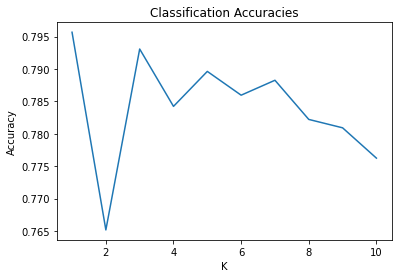

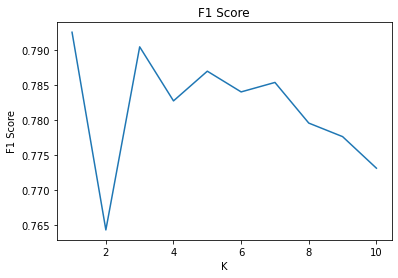

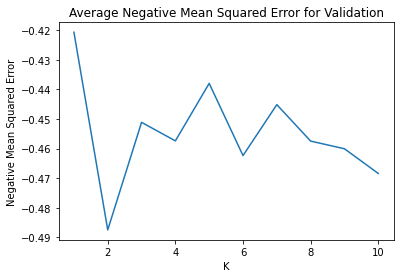

In [74]:
#Plot Accuracy graph
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array(listOfAccuracies)
plt.plot(x,y)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Classification Accuracies')
plt.show()


#Plot F1 Score graph 
y2 = np.array(listOfF1Score)
plt.plot(x,y2)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.show()

#Plot loss graph
y3 = np.array(listOfErrors)
plt.plot(x,y3)
plt.xlabel('K')
plt.ylabel('Negative Mean Squared Error')
plt.title('Average Negative Mean Squared Error for Validation')
plt.show()

### It can be concluded that 1 and 3 are the two best values for k.
### so now we will be running KNN for these 2 values to check its accuracy on Test data

In [76]:
print("For k = 1")
neigh = KNeighborsClassifier(n_neighbors=1) ## declaring the knn object
neigh.fit(trainX, trainY) ## fitting the knn on training data
predicted = neigh.predict(testX) ## using our model to predict on testing data
accuracy = accuracy_score(testY,predicted) ### calculating the accuracy
confusionMatrix = confusion_matrix(testY,predicted) ### calculating the confusion matrix
report = classification_report(testY,predicted) ### calculating the report
precision = precision_score(testY,predicted, average = 'macro') ## calculating the precision
recall = recall_score(testY,predicted, average = 'macro') ## calculating the recall
f1Score = f1_score(testY,predicted, average = 'macro') ## calculating the f1 score
meanSquaredError = mean_squared_error(testY,predicted) ## calculating the mean squared error


print("Accuracy: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1Score)
print("Mean Squared Error: ", meanSquaredError)
print("confusion_matrix: \n", confusionMatrix)
print("Report: \n", report)

For k = 1
Accuracy:  0.799482163406214
Precision score:  0.7959067598381647
Recall score:  0.7951324284509732
F1 score:  0.7953528015336184
Mean Squared Error:  0.4024741081703107
confusion_matrix: 
 [[ 784  115  113]
 [ 131  838  123]
 [ 121   94 1157]]
Report: 
               precision    recall  f1-score   support

           0       0.76      0.77      0.77      1012
           1       0.80      0.77      0.78      1092
           2       0.83      0.84      0.84      1372

    accuracy                           0.80      3476
   macro avg       0.80      0.80      0.80      3476
weighted avg       0.80      0.80      0.80      3476



In [77]:
print("For k = 3")
neigh = KNeighborsClassifier(n_neighbors=3) ## declaring the knn object
neigh.fit(trainX, trainY) ## fitting the knn on training data
predicted = neigh.predict(testX) ## using our model to predict on testing data
accuracy = accuracy_score(testY,predicted) ### calculating the accuracy

confusionMatrix = confusion_matrix(testY,predicted) ### calculating the confusion matrix
report = classification_report(testY,predicted) ### calculating the report
precision = precision_score(testY,predicted, average = 'macro') ### calculating the precision
recall = recall_score(testY,predicted, average = 'macro') ### calculating the recall
f1Score = f1_score(testY,predicted, average = 'macro') ## calculating the f1 score
meanSquaredError = mean_squared_error(testY,predicted) ## calculating the mean squared error

print("Accuracy: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1Score)
print("Mean Squared Error: ", meanSquaredError)
print("confusion_matrix: \n", confusionMatrix)
print("Report: \n", report)

For k = 3
Accuracy:  0.8086881472957422
Precision score:  0.8064821510609653
Recall score:  0.8050737835564808
F1 score:  0.8045033885744476
Mean Squared Error:  0.3967203682393556
confusion_matrix: 
 [[ 817   89  106]
 [ 168  827   97]
 [ 132   73 1167]]
Report: 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77      1012
           1       0.84      0.76      0.79      1092
           2       0.85      0.85      0.85      1372

    accuracy                           0.81      3476
   macro avg       0.81      0.81      0.80      3476
weighted avg       0.81      0.81      0.81      3476



### The value of k=3 gave better results and to improve accuracy we will now we use the ensemble method/bagging

In [78]:
#Use Bagging to improve accuracy 
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), n_estimators=104) ## using bagging to create our model
bagging.fit(trainX, trainY) ## fitting our model on training data
predicted = bagging.predict(testX) ## predicting on test data 
accuracy = accuracy_score(testY,predicted) ## calculating the accuracy
confusionMatrix = confusion_matrix(testY,predicted) ## calculating the confusion matrix
report = classification_report(testY,predicted) ## calculating the report
precision = precision_score(testY,predicted, average = 'macro') ## calculating the precision
recall = recall_score(testY,predicted, average = 'macro') ## calculating the recall
f1Score = f1_score(testY,predicted, average = 'macro') ## calculating the f1 score
meanSquaredError = mean_squared_error(testY,predicted) ## calculating the mean squared error

print("Accuracy: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1Score)
print("Mean Squared Error: ", meanSquaredError)
print("confusion_matrix: \n", confusionMatrix)
print("Report: \n", report)

Accuracy:  0.8181818181818182
Precision score:  0.8155516281677112
Recall score:  0.8132276872294618
F1 score:  0.8140340689565609
Mean Squared Error:  0.36565017261219795
confusion_matrix: 
 [[ 802   96  114]
 [ 127  850  115]
 [  99   81 1192]]
Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1012
           1       0.83      0.78      0.80      1092
           2       0.84      0.87      0.85      1372

    accuracy                           0.82      3476
   macro avg       0.82      0.81      0.81      3476
weighted avg       0.82      0.82      0.82      3476



### For KNN, we can conclude that for k = 3, using bagging further improves the results and we get an accuracy of 81.99 ~ 82%

## Part 2: SVM 

### Importing the relevant Sklearn libraries for SVM

In [31]:
from sklearn.svm import SVC

### Implementing cross validation for SVM to get the best value of C

In [103]:
def sklearn_cross_validate(X,y):
    c = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150] ## different values of C
    a = [] ## accuracy list
    f = [] ## f1 score list
    errors = [] ## errors list
    for i in range(len(c)):
        #Declare svm object
        svm_clf = SVC(C=c[i])
        #Cross validate 
        scoring = cross_validate(svm_clf, X, y, cv=5, scoring=("accuracy","f1_macro","neg_mean_squared_error"))
        avg_acc = np.average(scoring['test_accuracy'])
        avg_f1 = np.average(scoring['test_f1_macro'])
        err = np.average(scoring['test_neg_mean_squared_error'])
        a.append(avg_acc) ## appending the average accuracy for 5fold on ith value of C into the list of accuracies 
        f.append(avg_f1) ## appending the average f1 score for 5fold on ith value of C into the list of f1 scores 
        errors.append(err) ### appending the average neg mean squared error
    return a, f, errors

In [104]:
c = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]   
listOfAccuracies_SVM, listOfF1Scores_SVM, listOfErrors_SVM = sklearn_cross_validate(trainX,trainY)

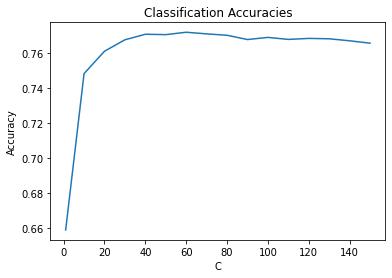

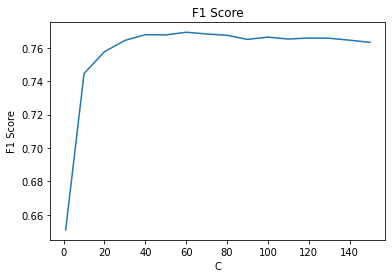

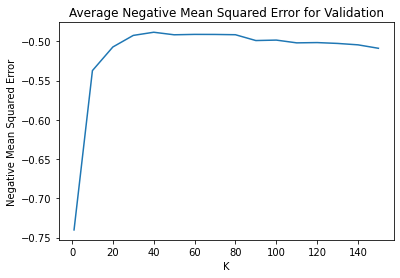

In [105]:
#Plot Accuracy graph
x = np.array(c)
y = np.array(listOfAccuracies_SVM)
plt.plot(x,y)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Classification Accuracies')
plt.show()
#Plot F1 Score graph 
y2 = np.array(listOfF1Scores_SVM)
plt.plot(x,y2)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.show()
#Plot loss graph
y3 = np.array(listOfErrors_SVM)
plt.plot(x,y3)
plt.xlabel('K')
plt.ylabel('Negative Mean Squared Error')
plt.title('Average Negative Mean Squared Error for Validation')
plt.show()

### The best value of C seems be around 60-80, we will be using 80
### Now we will be finding the best value of gamma by keeping C constant

In [36]:
print("Keeping C constant at 80 and finding the best value of gamma")

gammas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] ## list of gammas
accuracyListGamma = []

for g in gammas:
  svm = SVC(kernel='rbf', C = 140, gamma = g).fit(trainX, trainY)
  preds = svm.predict(testX)
  acc = accuracy_score(testY,preds)
  accuracyListGamma.append(acc)
  print("For gamma = ", g, "accuracy = ", acc)

Keeping C constant at 80 and finding the best value of gamma
For gamma =  0.1 accuracy =  0.7873993095512083
For gamma =  0.2 accuracy =  0.7951668584579977
For gamma =  0.3 accuracy =  0.8178941311852704
For gamma =  0.4 accuracy =  0.8311277330264673
For gamma =  0.5 accuracy =  0.8340046029919448
For gamma =  0.6 accuracy =  0.8380322209436134
For gamma =  0.7 accuracy =  0.8363060989643268
For gamma =  0.8 accuracy =  0.8351553509781358
For gamma =  0.9 accuracy =  0.8374568469505178
For gamma =  1.0 accuracy =  0.8305523590333717


### The best value of gamma is 0.6.
### To further improve the accuracy we will try the ensemble/bagging method

In [39]:
clf = BaggingClassifier(base_estimator=SVC(kernel='rbf', C = 100, gamma = 0.6),
                        n_estimators=20, random_state=40).fit(trainX, trainY)
preds = clf.predict(testX)
acc = accuracy_score(testY,preds)
precision = precision_score(testY,preds, average = 'macro')
recall = recall_score(testY,preds, average = 'macro')
f1Score = f1_score(testY,preds, average = 'macro')
confusionMatrix_svm = confusion_matrix(testY,preds)
report_svm = classification_report(testY,preds)
meanSquaredError = mean_squared_error(testY,preds) ## calculating the mean squared error

print("Accuracy: ", acc)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1Score)
print("Mean squared error: ", meanSquaredError)
print("confusion_matrix: \n", confusionMatrix)
print("Report: \n", report)


Accuracy:  0.8414844649021864
Precision score:  0.8405980296473627
Recall score:  0.8363236635197593
F1 score:  0.8377300315518418
confusion_matrix: 
 [[ 799  117   96]
 [ 101 1197   74]
 [ 126  112  854]]
Report: 
               precision    recall  f1-score   support

          en       0.78      0.79      0.78      1012
          ue       0.84      0.87      0.86      1372
          ur       0.83      0.78      0.81      1092

    accuracy                           0.82      3476
   macro avg       0.82      0.81      0.82      3476
weighted avg       0.82      0.82      0.82      3476



### For SVM, we can conclude that for c=80 and gamma = 0.6, along with bagging the model gives an accuracy of 84.14% on training data


## Part3: Neural Net

### Importing the relevant libraries

In [80]:
from sklearn.neural_network import MLPClassifier

### Implementing cross validation to find the best value of alpha for a fixed hidden layers (14,14)

In [100]:
def cross_validation_NN(X,y):
  alpha = [i*0.0001 for i in range(1,11)]
  a = [] 
  f = []
  errors = []
  for each in alpha:
    #Declare svm object
    NN = MLPClassifier(solver='adam',hidden_layer_sizes=(14,14),alpha=each,max_iter=1000)
    #Cross validate 
    scoring = cross_validate(NN, X, y, cv=5, scoring=("accuracy","f1_macro", "neg_mean_squared_error"))
    avg_acc = np.average(scoring['test_accuracy'])
    avg_f1 = np.average(scoring['test_f1_macro'])
    err = np.average(scoring['test_neg_mean_squared_error'])
    errors.append(err)
    a.append(avg_acc)
    f.append(avg_f1)
  return a, f,errors

In [101]:
alpha = [i*0.0001 for i in range(1,11) ]   
accuracies_NN, f1Score_NN, errors_NN = cross_validation_NN(trainX,trainY)

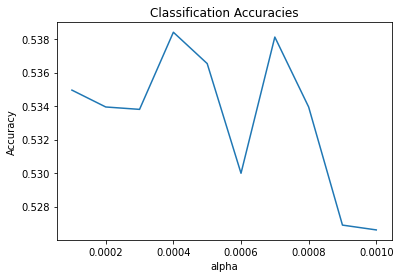

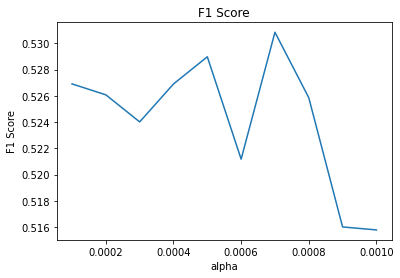

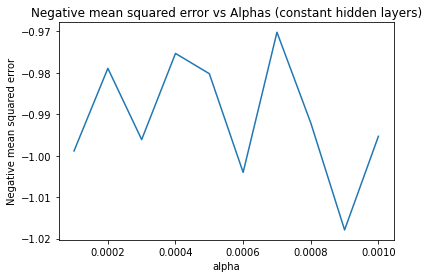

In [102]:
#Plot Accuracy graph
x = np.array(alpha)
y = np.array(accuracies_NN)
plt.plot(x,y)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Classification Accuracies')
plt.show()


#Plot F1 Score graph 
y2 = np.array(f1Score_NN)
plt.plot(x,y2)
plt.xlabel('alpha')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.show()

#Pot neg mean squared error
y3 = np.array(errors_NN)
plt.plot(x,y3)
plt.xlabel('alpha')
plt.ylabel('Negative mean squared error')
plt.title('Negative mean squared error vs Alphas (constant hidden layers)')
plt.show()

## For the best values of alpha which are 0.0007 and 0.0008, we checked for the best hidden layer combination using trial and error which turned out to be (1024,512,256)

### Running on alpha = 0.0007 and hidden layers = (1024,512,256)

In [90]:
NN = MLPClassifier(hidden_layer_sizes=(1024,512,256), max_iter=1000,alpha=0.0007)
NN.fit(trainX,trainY)
preds = NN.predict(testX)
accuracy_NN = accuracy_score(testY,preds)
f1Score = f1_score(testY,preds,average = 'macro')
precision = precision_score(testY,preds,average = 'macro')
recall = recall_score(testY,preds, average = 'macro')
confusionMatrix_svm = confusion_matrix(testY,preds)
report = classification_report(testY,preds)
meanSquaredError = mean_squared_error(testY,preds) 


print("Accuracy: ", accuracy_NN)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1Score)
print("Mean squared error: ", meanSquaredError)
print("confusion_matrix: \n", confusionMatrix)
print("Report: \n", report)


Accuracy:  0.799482163406214
Precision score:  0.7994174565131639
Recall score:  0.7925379116594734
F1 score:  0.7946673264530698
Mean squared error:  0.4223245109321059
confusion_matrix: 
 [[ 802   96  114]
 [ 127  850  115]
 [  99   81 1192]]
Report: 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      1012
           1       0.83      0.74      0.79      1092
           2       0.80      0.87      0.84      1372

    accuracy                           0.80      3476
   macro avg       0.80      0.79      0.79      3476
weighted avg       0.80      0.80      0.80      3476



## Plotting the loss curve now

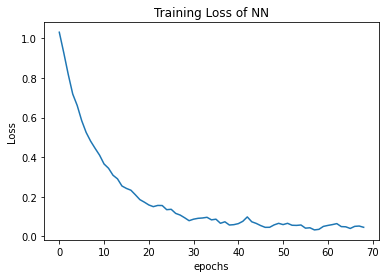

In [92]:
plt.plot(NN.loss_curve_)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training Loss of NN')
plt.show()

### Now Running on alpha = 0.0008 and hidden layers = (1024,512,256)

In [93]:
NN = MLPClassifier(hidden_layer_sizes=(1024,512,256), max_iter=1000,alpha=0.0008)
NN.fit(trainX,trainY)
preds = NN.predict(testX)
accuracy_NN = accuracy_score(testY,preds)
f1Score = f1_score(testY,preds,average = 'macro')
precision = precision_score(testY,preds,average = 'macro')
recall = recall_score(testY,preds, average = 'macro')
confusionMatrix_svm = confusion_matrix(testY,preds)
report = classification_report(testY,preds)
meanSquaredError = mean_squared_error(testY,preds) 


print("Accuracy: ", accuracy_NN)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1Score)
print("Mean squared error: ", meanSquaredError)
print("confusion_matrix: \n", confusionMatrix)
print("Report: \n", report)

Accuracy:  0.7989067894131185
Precision score:  0.7945453550949698
Recall score:  0.7958537814349705
F1 score:  0.7949076179074597
Mean squared error:  0.41858457997698506
confusion_matrix: 
 [[ 802   96  114]
 [ 127  850  115]
 [  99   81 1192]]
Report: 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1012
           1       0.78      0.82      0.80      1092
           2       0.85      0.82      0.83      1372

    accuracy                           0.80      3476
   macro avg       0.79      0.80      0.79      3476
weighted avg       0.80      0.80      0.80      3476



### Plotting the loss curve now

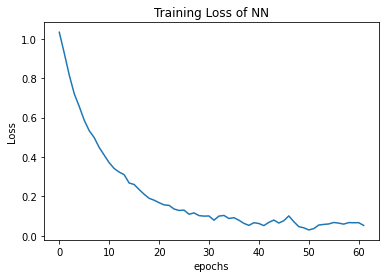

In [94]:
plt.plot(NN.loss_curve_)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training Loss of NN')
plt.show()

## Using bagging to improve accuracy of Neural Net. We noticed that we got the highest accuracy on alpha = 0.0001 and hidden layers = (1024,512,256) when we used bagging. However, the change in accuracy is very small if we change alpha to 0.0008 or 0.0007

In [99]:
NN_Bagging = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(1024,512,256), max_iter=1000),
                        n_estimators=20, random_state=40).fit(trainX, trainY)
preds = NN.predict(testX)
accuracy_NN = accuracy_score(testY,preds)
f1Score = f1_score(testY,preds,average = 'macro')
precision = precision_score(testY,preds,average = 'macro')
recall = recall_score(testY,preds, average = 'macro')
confusionMatrix_svm = confusion_matrix(testY,preds)
report = classification_report(testY,preds)
meanSquaredError = mean_squared_error(testY,preds) 


print("Accuracy: ", accuracy_NN)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1Score)
print("Mean squared error: ", meanSquaredError)
print("confusion_matrix: \n", confusionMatrix)
print("Report: \n", report)


Accuracy:  0.799482163406214
Precision score:  0.795688541900691
Recall score:  0.7982331924213023
F1 score:  0.7965705351170965
Mean squared error:  0.4318181818181818
confusion_matrix: 
 [[ 802   96  114]
 [ 127  850  115]
 [  99   81 1192]]
Report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      1012
           1       0.80      0.81      0.80      1092
           2       0.85      0.81      0.83      1372

    accuracy                           0.80      3476
   macro avg       0.80      0.80      0.80      3476
weighted avg       0.80      0.80      0.80      3476



### For NN, we can conclude that for alpha = 0.0001 (default) and hidden layers = (1024,512,256) along with bagging, we get the maximum accuracy which is 79.95 ~ 80 %

## End of Project Phase 2 

---

